In [20]:
import pyuvsim
import pyuvdata
import numpy
import pandas
import seaborn
from matplotlib import pyplot as plt

## Read in Vincent's CST beam files

Vincent's converts CST outs to .npy:
- phi: 2D array with phi coordinates (Azimuthal) in DEGREE
- theta: 2D Array with theta coordinates (Zenith Angle) in DEGREE
- Freqs: 1D Array with frequency coordinates in GHz
- Beams: 3D Array with beam values in Watts(??) per freqs, phi, theta

This need to be converted HERA/CST text files to be imported by pyuvdata/pyuvsim

In [2]:
beam_path = "/Users/ronniyjoseph/Sync/MSI_Fellowship/CHORD/Beam_Models/CST_Beams/"
# phi = numpy.load(beam_path + "/45deg_20m_cable/all_phi.npy")/180*numpy.pi
# theta = numpy.load(beam_path + "/45deg_20m_cable/all_theta.npy")/180*numpy.pi
# freqs = numpy.load(beam_path + "/45deg_20m_cable/all_freqs.npy")
# beams = numpy.load(beam_path +"/45deg_20m_cable/all_beams.npy")

## Converting Vincent's beam files

In [40]:
import os
import glob
from pyuvdata import UVBeam
from pyuvdata.data import DATA_PATH
import numpy as np
beam = UVBeam()

In [8]:
filenames = sorted(glob.glob(beam_path + "*.txt"))

In [44]:
frequencies = np.arange(0.3,1.6,0.1)*1e9
print(frequencies)

[3.0e+08 4.0e+08 5.0e+08 6.0e+08 7.0e+08 8.0e+08 9.0e+08 1.0e+09 1.1e+09
 1.2e+09 1.3e+09 1.4e+09 1.5e+09]


In [45]:
beam.read_cst_beam(filenames, beam_type='efield', frequency=frequencies,
...                    feed_pol='x', rotate_pol=True, telescope_name='CHORD',
...                    feed_name='PAPER_dipole', feed_version='0.1',
...                    model_name='E-field pattern - Rigging height 4.9m',
...                    model_version='1.0')

In [46]:
print(beam.beam_type)

efield


In [55]:
beam.efield_to_power()

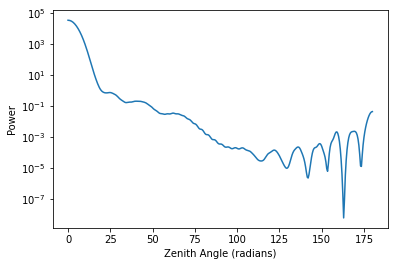

In [57]:
>>> plt.plot(np.degrees(beam.axis2_array), abs(beam.data_array[0, 0, 0, 0, :, 0]) )
>>> plt.yscale('log') 
>>> plt.xlabel('Zenith Angle (radians)') 
>>> plt.ylabel('Power') 
>>> plt.show() 

In [59]:
beam.write_beamfits('chord.uvbeam', clobber=True)

## Look at pyuvsim output

In [2]:
import os
from pyuvdata import UVData
from pyuvdata.data import DATA_PATH
from matplotlib import pyplot as plt
import numpy as np

In [11]:
UV = UVData()

In [40]:
#filename = os.path.join(DATA_PATH, "sim_results.uvfits")
UV.read("/Users/ronniyjoseph/Sync/MSI_Fellowship/Arpeggio/output/time_results.uvfits")

Telescope CHORD is not in known_telescopes.


In [41]:
print(UV.data_array.shape)
print("There are", UV.Ntimes, "times")
print("There are", UV.Nfreqs, "frequencies")
print("There are", UV.baseline_array.shape[0], "baselines")
print(UV.baseline_to_antnums(UV.baseline_array))


(241500, 1, 1, 4)
There are 100 times
There are 1 frequencies
There are 241500 baselines
(array([ 0,  1,  2, ..., 67, 68, 68]), array([ 0,  0,  0, ..., 67, 67, 68]))


In [42]:
print(UV.integration_time)
print(UV.channel_width)

[600. 600. 600. ... 600. 600. 600.]
1.0


 ...]

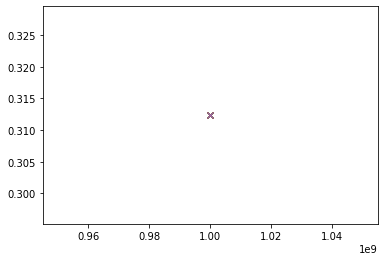

In [59]:
selection = UV.copy()
selection.select(times=np.unique(selection.time_array)[1])

plt.plot(selection.freq_array[0,:], np.real(selection.data_array[:,0,:,0].re), "x")

 ...]

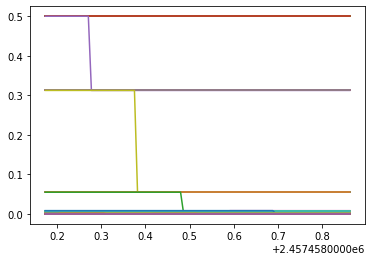

In [112]:
selection = UV.copy()
selection.select(times=np.unique(selection.time_array))
plt.plot(np.unique(selection.time_array), 
         np.real(selection.data_array[:,0,0,0].reshape(len(np.unique(UV.baseline_array)),UV.Ntimes ).T))

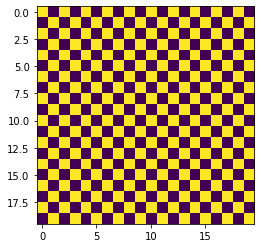